In [1]:
import os
import sys
import dask
import uproot4
import numpy as np
import pandas as pd
from hist import Hist
import hist
import uproot4 as uproot
from dask.array import histogram as ds_hist
import dask.dataframe as dd
import timeit
from distributed import Client
import storage_functions as sf
import time
import psutil
##procedurre to make client dask work
# read hdf data convert it to csv and save it, then read csv with dask data frame
# or just reset index and then go from there
# 2tb of data run 2gb per job each job takes half a day
# try load pickle create new files
import re
import subprocess
from pympler import asizeof
import hist_vars

In [2]:
(Hist(hist.axis.Regular(20, 300000, 600000, name='x', label='$p_{T}$[MeV]')))

Hist(Regular(20, 300000, 600000, name='x', label='$p_{T}$[MeV]'), storage=Double())

In [3]:
(sf.Histogram_wrapper(hist.axis.Regular(20, 300000, 600000, name='x', label='$p_{T}$[MeV]'),name='x'))

Histogram_wrapper(Regular(20, 300000, 600000, name='x', label='$p_{T}$[MeV]'), storage=Double())

In [4]:
histo_var_dict = sf.combine_dicts([hist_vars.var_main, hist_vars.var_series, hist_vars.var_beta, 
                               hist_vars.var_ecf_beta, hist_vars.var_dichoric, hist_vars.var_ecfg])

In [24]:
histo_var_dict

{'rljet_pt_comb': Regular(20, 300000, 600000, name='x', label='$p_{T}$[MeV]'),
 'rljet_m_comb[:,0]': Regular(20, 50000, 500000, name='x', label='m [MeV]'),
 'rljet_Angularity': Regular(20, 0, 0.1, name='x', label='Angularity'),
 'rljet_Aplanarity': Regular(20, 0, 1, name='x', label='Aplanarity'),
 'rljet_C2': Regular(20, 0, 1, name='x', label='$C_{2}$'),
 'rljet_D2': Regular(20, 0, 6, name='x', label='$D_{2}$'),
 'rljet_Dip12': Regular(20, 0, 2, name='x', label='Dip12'),
 'rljet_ECF1': Regular(20, 0, 1e+07, name='x', label='ECF$_{1}$'),
 'rljet_ECF2': Regular(20, 0, 1e+12, name='x', label='ECF$_{2}$'),
 'rljet_ECF3': Regular(20, 0, 1e+17, name='x', label='ECF$_{3}$'),
 'rljet_FoxWolfram0': Regular(20, 0, 1, name='x', label='FoxWolfram0'),
 'rljet_FoxWolfram2': Regular(20, 0, 1, name='x', label='FoxWolfram2'),
 'rljet_KtDR': Regular(20, 0, 6, name='x', label='KtDR'),
 'rljet_Mu12': Regular(20, 0, 1, name='x', label='Mu12'),
 'rljet_L1': Regular(20, 0, 1, name='x', label='$L_{1}$'),
 'rl

In [23]:
len(histo_var_dict)

93

In [5]:
histogramming = sf.HistoMaker()

In [6]:
client = histogramming.client_start(n_workers = 8,memory_limit='2GB',threads_per_worker=1)

In [7]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 8
Total threads: 8,Total memory: 14.90 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41062,Workers: 8
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 14.90 GiB
Comm: tcp://127.0.0.1:39689,Total threads: 1
Dashboard: http://127.0.0.1:42491/status,Memory: 1.86 GiB
Nanny: tcp://127.0.0.1:43782,


In [8]:

x = histogramming.create_file_list(top_directory = '/eos/atlas/atlascerngroupdisk/perf-jets/JSS/WTopBackgroundSF2019/UFO_test/slimmed_SEP_v1/')

In [26]:
len(x)

2890

In [9]:
data = histogramming.load_pkl(x[0])

In [10]:
histogramming.histogram_variables

{}

In [11]:
output = dask.compute(histogramming.fill(data,histogramming.histogram_variables))

In [14]:
output[0]

[]

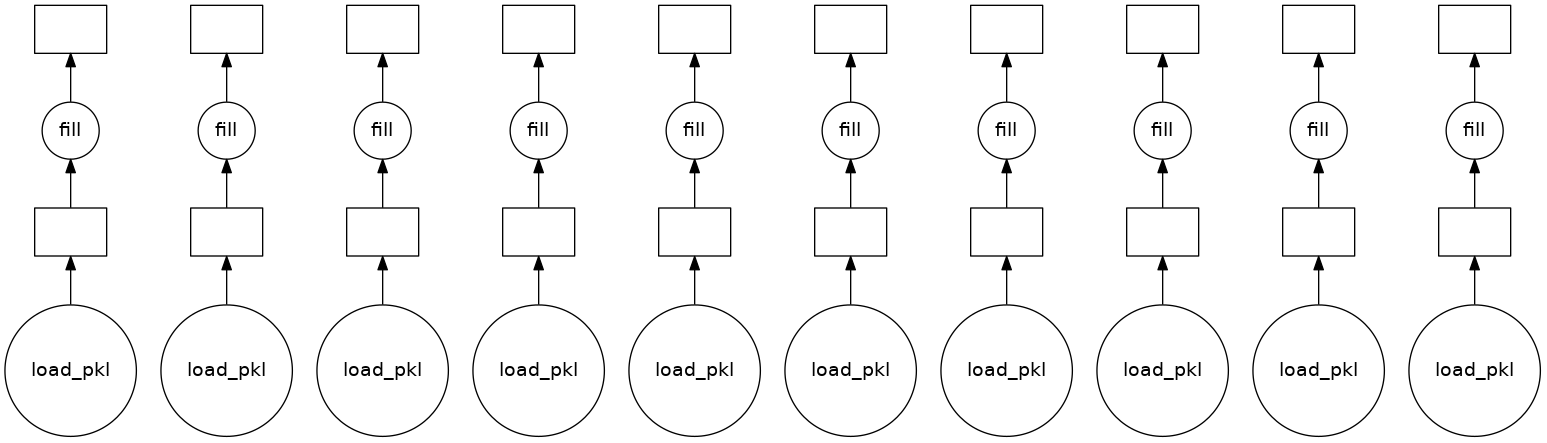

In [15]:
dask.visualize(histogramming.load_and_fill(file_list = x[:10]))

In [16]:
temp = pd.read_pickle(x[2000])

In [17]:
temp

,,rljet_L4,rljet_L5,rljet_L2,rljet_topTag_DNN20_TausRatio_inclusive_score,rljet_topTag_DNN20_TausRatio_qqb_score,rljet_pt_comb,rljet_M2,rljet_L3,rljet_L1,rljet_topTag_DNN20_qqb_score,rljet_topTag_DNN19_qqb_score,rljet_topTag_DNN19_inclusive_score,rljet_D2,rljet_N3,rljet_N2,rljet_topTag_DNN20_inclusive_score,rljet_ungroomed_ntrk500,"rljet_m_comb[:,0]"
entry,subentry,,,,,,,,,,,,,,,,,,
0,0,1.478220,0.173853,0.142326,0.233609,0.028133,234297.921875,0.058569,0.049985,0.052006,0.008996,0.144268,0.305211,1.608747,2.194288,0.261934,0.318813,25,77868.570312
1,0,1.159872,0.182679,0.198222,0.065824,0.028205,533714.125000,0.098365,0.097097,0.096210,0.039847,0.186804,0.116970,1.039699,1.467166,0.290440,0.073059,53,256805.593750
2,0,1.424379,0.212927,0.246536,0.084335,0.009025,234563.500000,0.091785,0.067575,0.079675,0.009816,0.098301,0.111656,2.505868,1.881467,0.373857,0.062968,19,77142.257812
3,0,1.553125,0.290454,0.179543,0.515852,0.180849,237934.281250,0.078671,0.072736,0.074003,0.074075,0.298814,0.515191,1.265350,1.748846,0.272025,0.525609,19,97159.187500
4,0,1.127484,0.339977,0.298020,0.384343,0.175337,257513.250000,0.152028,0.136176,0.135310,0.660136,0.783664,0.736589,1.391467,1.362434,0.377992,0.562129,40,169429.921875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,0,1.242116,0.224202,0.217022,0.134496,0.031480,272262.781250,0.098071,0.081542,0.085398,0.033329,0.242306,0.195403,1.739679,1.758764,0.342052,0.169166,22,113011.375000
5555,0,1.908339,0.368705,0.236607,0.146140,0.021759,210497.765625,0.071563,0.049858,0.069407,0.052708,0.084438,0.040196,2.957101,2.540267,0.373789,0.456937,22,68926.210938
5556,0,1.231826,0.254990,0.271303,0.090766,0.011847,224611.203125,0.110704,0.089852,0.102500,0.011317,0.026447,0.075495,1.870320,1.654624,0.371276,0.065832,22,56957.425781


In [18]:
#%%time
#temp = dask.compute(histogramming.load_and_fill(data_column = 'rljet_pt_comb',file_list = x[:200]))

In [19]:
%%time
xxxxx = histogramming.compute_histograms(chunk_size = 150,file_list = x[:], histogram_variables = histo_var_dict)

CPU times: user 1min 29s, sys: 20.8 s, total: 1min 50s
Wall time: 4min 19s


In [20]:
len(xxxxx)

2831

In [25]:
xxxxx[0]

[Hist(Regular(20, 300000, 600000, name='x', label='$p_{T}$[MeV]'), storage=Double()) # Sum: 8849.0 (27047.0 with flow),
 Hist(Regular(20, 0, 6, name='x', label='$D_{2}$'), storage=Double()) # Sum: 27047.0,
 Hist(Regular(20, 0, 1, name='x', label='$M_{2}$'), storage=Double()) # Sum: 27047.0,
 Hist(Regular(20, 0, 5, name='x', label='$L_{4}$'), storage=Double()) # Sum: 27047.0,
 Hist(Regular(20, 0, 1, name='x', label='$L_{3}$'), storage=Double()) # Sum: 27047.0,
 Hist(Regular(20, 0, 1, name='x', label='$L_{1}$'), storage=Double()) # Sum: 27047.0,
 Hist(Regular(20, 0, 1, name='x', label='$L_{2}$'), storage=Double()) # Sum: 27047.0,
 Hist(Regular(20, 0, 1, name='x', label='$N_{2}$'), storage=Double()) # Sum: 27047.0,
 Hist(Regular(20, 0, 6, name='x', label='$N_{3}$'), storage=Double()) # Sum: 27045.0 (27047.0 with flow),
 Hist(Regular(20, 50000, 500000, name='x', label='m [MeV]'), storage=Double()) # Sum: 27041.0 (27047.0 with flow),
 Hist(Regular(20, 0, 100, name='x', label='$N_{trk,500}$'

In [22]:
xxxxx[2000][8]

Hist(Regular(20, 0, 6, name='x', label='$N_{3}$'), storage=Double()) # Sum: 1389.0

In [ ]:
#dask.visualize(histogramming.load_and_fill(data_column = 'rljet_pt_comb',file_list = x[:4]))

In [ ]:
asizeof.asizeof(temp)/1024**2

In [ ]:
psutil.virtual_memory().percent